<a href="https://colab.research.google.com/github/shreyakaushik19/codsoft_machinelearning/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.shape

(5572, 5)

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1635,ham,You have come into my life and brought the sun...,NaN,NaN,NaN
5486,ham,Ofcourse I also upload some songs,NaN,NaN,NaN
4720,ham,"Yup. Anything lor, if u dun wan it's ok...",NaN,NaN,NaN
2130,ham,Later i guess. I needa do mcat study too.,NaN,NaN,NaN
3914,ham,Ard 530 lor. I ok then message Ì_ lor.,NaN,NaN,NaN


In [8]:
 df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
1416,ham,No..few hours before.went to hair cut .
3533,ham,Good evening! How are you?
5014,ham,I think the other two still need to get cash b...
4265,ham,The greatest test of courage on earth is to be...
3502,ham,Free any day but i finish at 6 on mon n thurs...


In [10]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)


,target,text
4903,ham,"no, i *didn't* mean to post it. I wrote it, an..."
1859,ham,What's up. Do you want me to come online?
64,ham,Ok lar i double check wif da hair dresser alre...
4816,ham,Me too. Mark is taking forever to pick up my p...
1597,spam,URGENT! Your Mobile number has been awarded wi...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

converting the "ham" and "spam" to numbers

In [12]:
df['target'] = encoder.fit_transform(df['target'])

0->ham
1->spam

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

Exploratory data analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


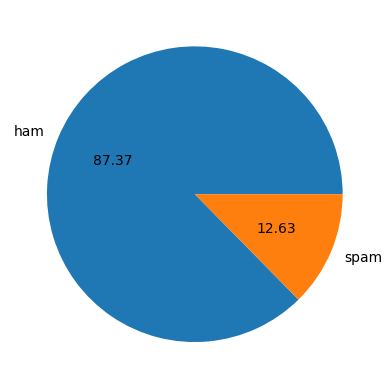

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

DATA IS VERY UNBALANCED

In [20]:
import nltk

Natural Language Toolkit: It is the go-to API for NLP (Natural Language Processing) with Python

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
#no of characters
df['num_of_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#no of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

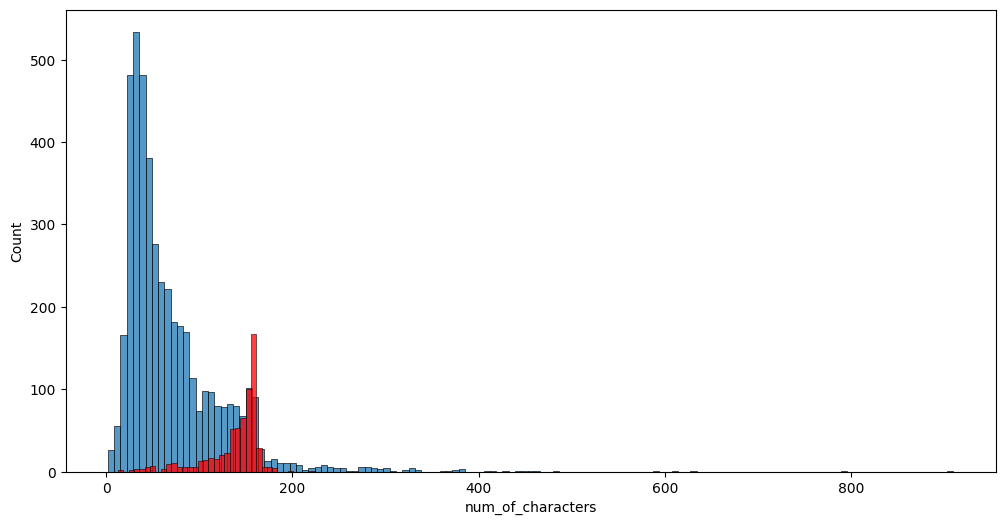

In [33]:
#graphical visualization of the data obtained

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'],color='red')
plt.show()

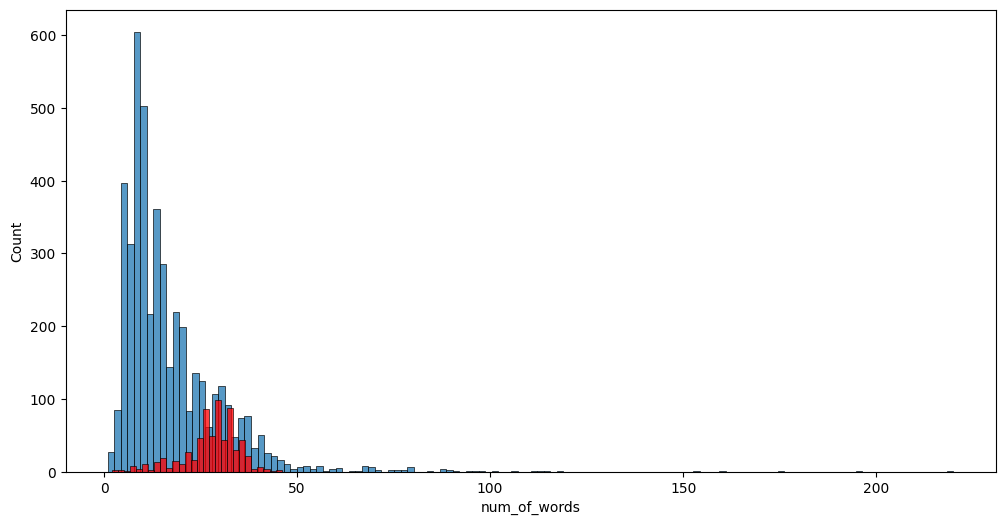

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'],color='red')
plt.show()

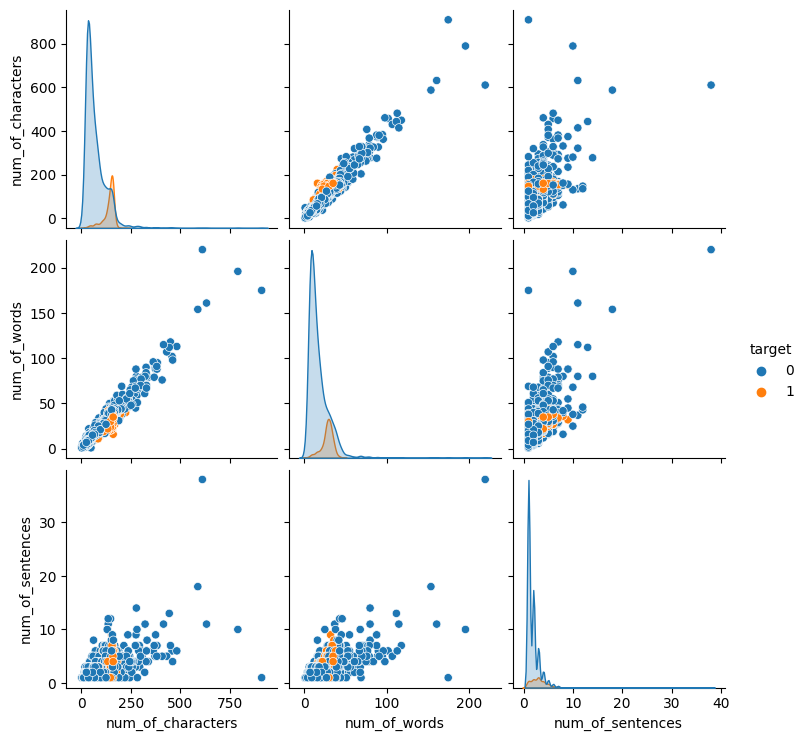

In [36]:
sns.pairplot(df, hue='target')
plt.show()

<ipython-input-37-12950adc035d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


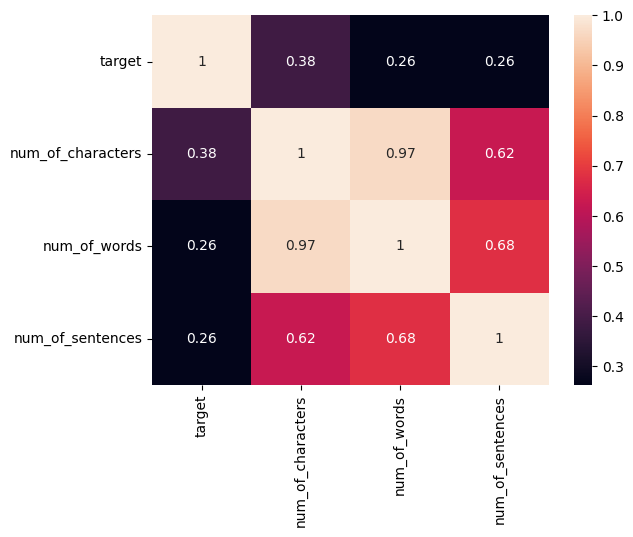

In [37]:
#heatmap visualization of correlations

sns.heatmap(df.corr(), annot=True)
plt.show()

3. Data Preprocessing
i) Lower case

ii) Tokenization

iii) Removing special characters

iv) Removing stop words and punctuation

v) Stemming


In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('loving') -> output will be love (just a sample how stemming works)
from nltk.corpus import stopwords
# stopwords.words('english') will give words like -> ['i','me','my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", ....
import string

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
#wordcloud visualization
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

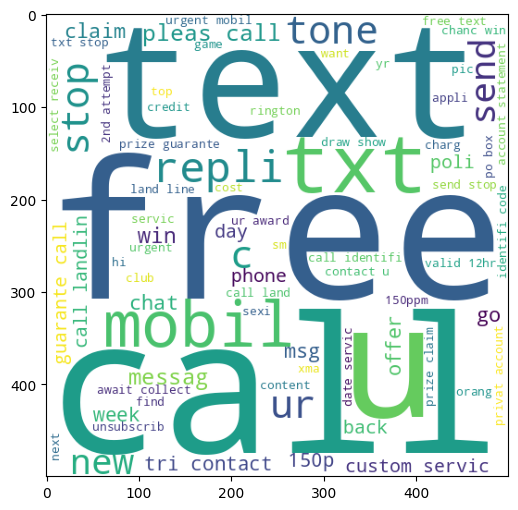

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

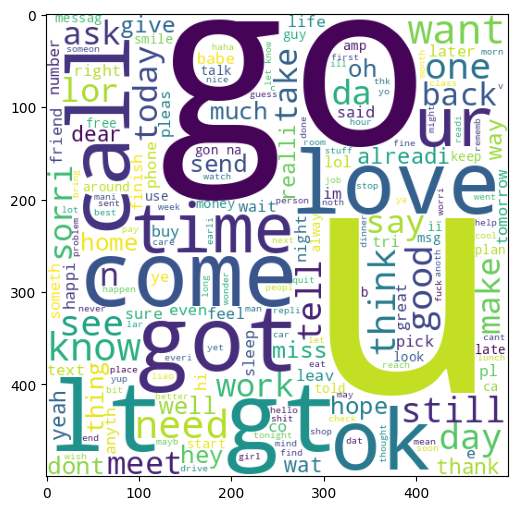

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [48]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [50]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

In [52]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [53]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() #less precise
tfidf = TfidfVectorizer(max_features=3000) #with max_Features it gives more accuracy with precision

In [55]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

X.shape

(5169, 3000)

In [56]:
y = df['target'].values

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [61]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [62]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Hence we will use tfidf --> MNB

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [67]:
train_classifier(svc,X_train,y_train,X_test,y_test) #demo run of the function

(0.9758220502901354, 0.9747899159663865)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values

In [75]:
performance_df

<bound method DataFrame.sort_values of    Algorithm  Accuracy  Precision
0        SVC  0.975822   0.974790
1         KN  0.905222   1.000000
2         NB  0.970986   1.000000
3         DT  0.928433   0.820000
4         LR  0.958414   0.970297
5         RF  0.975822   0.982906
6   AdaBoost  0.960348   0.929204
7        BgC  0.958414   0.868217
8        ETC  0.974855   0.974576
9       GBDT  0.946809   0.919192
10       xgb  0.967118   0.933333>

Model improve

Change the max_features parameter of TfIdf

In [80]:
performance_df

<bound method DataFrame.sort_values of    Algorithm  Accuracy  Precision
0        SVC  0.975822   0.974790
1         KN  0.905222   1.000000
2         NB  0.970986   1.000000
3         DT  0.928433   0.820000
4         LR  0.958414   0.970297
5         RF  0.975822   0.982906
6   AdaBoost  0.960348   0.929204
7        BgC  0.958414   0.868217
8        ETC  0.974855   0.974576
9       GBDT  0.946809   0.919192
10       xgb  0.967118   0.933333>

After comparing all the algorithms, it can be concluded that MNB gives us the best performance.

In terms of accuracy if we see then SVC comes on top but as the data is highly imbalanced, accuracy is not a good measure of performance.

Both MNB and KNC have precision of 1, but KNC's accuracy is way lower than MNB.

Hence considering both the factors, MNB has given the best performance here